# Videos and Exercises for Session 2: Data Structuring in Pandas I

In this combined teaching module and exercise set, you will be working with structuring data. 

We will start out with a recap of some basic function and methods that become available in pandas. Then there will be a short intermezzo, where you will be required to think a bit about how to write readible code and make use of the method chaining opportunities that come with python. Then finally, you will get to work with some more advanced data types that are handled natively with pandas. The structure is as follows:
1. Welcome (Back to) Pandas
    - DataFrames and Series
    - Operations with Elementary Data Types in the Context of Pandas
        - Boolean Series
        - String Operations
        - Numeric Operations and Methods
2. Readible Code and Method Chaining
3. More Advanced Data Types
    - Categorical Data
    - Time Series Data
    
**NOTE:** I might be speaking quite slowly in some of the videos. A good advice is to turn up the speed to x1.25 or x1.5 if you want to get through without spending too much time:)

## Packages
Load in the required modules and set up the plotting library:

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

Wonder what `%matplotlib inline` does? It's not too important for now. However, if you are interested, you can read more about it [here](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline).

# Part 1: Welcome (Back to) Pandas

As mentioned during the lecture, data structuring skills are necessary to become a great data scientist. There is no way around it.

Let's start with the basics. In the first video, we start out by talking about the fundamentals of Pandas: 
- The Pandas DataFrame and the Pandas Series. 
- We then proceed and discuss how indices and colums can be named and selected. 
- Finally, we make some simple operations.

**NOTE:** This is mainly repitition of what you already worked with in assignment 0. If you feel comfortable with this, you should proceed to the associated exercises that will get you warmed up for the rest of this notebook.

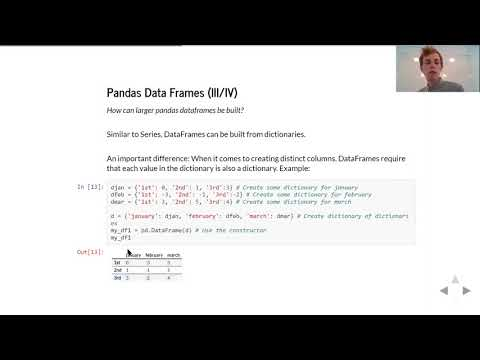

In [3]:
YouTubeVideo('uSiqryfDYo0', width=640, height=360)

In this set of introductory exercises, we are going to briefly touch upon some of the tools from the video. Again, be aware that there is going to be some repition of the content from assignment 0 here - but these things are all very useful to get under your skin!

> **Ex. 2.1.1**: Run the following two lines below. Explain to yourself what the second line did, and how each entry affected it. In relation to this, what did the first line ensure? When can this be useful? Try and play around with the seed.

In [4]:
np.random.seed(seed=161193)
np_arr=np.round(np.random.exponential(10, size=(10**5,3)),0)
np_arr[:10]

array([[ 5.,  0.,  2.],
       [ 4.,  7., 20.],
       [ 1.,  4.,  2.],
       [ 3.,  9.,  4.],
       [ 5.,  2., 13.],
       [ 2.,  6.,  0.],
       [12., 16., 14.],
       [30.,  5., 18.],
       [21.,  0.,  2.],
       [11., 14.,  1.]])

Answer:




Now, we want you to investigate how easy it is to go from a numpy `array` to a pandas `DataFrame`. You are going to do something similar to this repeatedly in this course!

> **Ex. 2.1.2**: Create a Pandas DataFrame called `my_df` from `np_arr`:

In [5]:
# YOUR CODE HERE
my_df = pd.DataFrame(data=np_arr)
my_df.head(10)

,0,1,2
0,5.0,0.0,2.0
1,4.0,7.0,20.0
2,1.0,4.0,2.0
3,3.0,9.0,4.0
4,5.0,2.0,13.0
5,2.0,6.0,0.0
6,12.0,16.0,14.0
7,30.0,5.0,18.0
8,21.0,0.0,2.0
9,11.0,14.0,1.0


Before we continue working with this DataFrame, we want to make sure that you are capable of transforming it back to different types of containers. This is another very fundamental tool in your data science toolbox.

> **Ex. 2.1.3**: In the following cell, generate an `array`, a `list` and a `dict` from `my_df` (you should be able to do each of these things in one line). Verify that you did this properly by printing your output. Inspect the dictionary: How do you access the value associated with the column index 2 and row index 8543?

In [6]:
# YOUR CODE HERE
toarr = my_df.to_numpy()
tolist = my_df.values.tolist()
todict = my_df.to_dict()
value = todict[2][8543]
#value
my_df

,0,1,2
0,5.0,0.0,2.0
1,4.0,7.0,20.0
2,1.0,4.0,2.0
3,3.0,9.0,4.0
4,5.0,2.0,13.0
...,...,...,...
99995,2.0,7.0,14.0
99996,5.0,3.0,7.0
99997,1.0,25.0,5.0
99998,1.0,47.0,6.0


A noticeable distiction between pandas dataframes and, say, numpy arrays is the option to label indices and (in particular) columns. This is helpful when working with large sets of data.

> **Ex. 2.1.4**: Going back to the DataFrame `my_df`, we now want you to try the following: 
> 1. Label the columns 'apples', 'bananas' and 'oranges'
> 2. Change the indices to 'cust**x**' where **x** is a sequential numbering of the lines starting from 1 (*hint:* There are many ways to do this, e.g. with a list comprehension!)
> 3. Print the first 10 observations using the `head()` method.

In [7]:
# YOUR CODE HERE
my_df.columns = ["apples", "bananas", "oranges"]
my_df.index = 'cust' + (my_df.index + 1).astype(str)
#my_df.index = ['chris' + str(ind) for ind in range(0, len(my_df.index))]
my_df

,apples,bananas,oranges
cust1,5.0,0.0,2.0
cust2,4.0,7.0,20.0
cust3,1.0,4.0,2.0
cust4,3.0,9.0,4.0
cust5,5.0,2.0,13.0
...,...,...,...
cust99996,2.0,7.0,14.0
cust99997,5.0,3.0,7.0
cust99998,1.0,25.0,5.0
cust99999,1.0,47.0,6.0


As we saw in the video, we can basically extract a series from a pandas dataframe by simply selecting one column from the dataframe and storing it as a new object.

> **Ex. 2.1.5**: Now, we want you to select only a single column and inspect the output a bit:
> 1. Select 'apples' and store it as 'apples_ser'. Try using the key-based method and the object-based method, respectively. 
> 2. Check the data type. Thinking about our first lines of code, why is it not an `integer`? Convert the data in both 'apples_ser' and 'my_df' to intergers.

In [8]:
apples_ser = my_df[["apples"]]
apples_ser2 = my_df.iloc[:,0]
type(apples_ser.values)
my_df = my_df.astype(int)
apples_ser = apples_ser.astype(int)
print(my_df.dtypes)

apples     int64
bananas    int64
oranges    int64
dtype: object


## Boolean Series

In [ ]:
YouTubeVideo('CfiV8QmfGVk', width=640, height=360)

Boolean 'data' is the simplest data type that we work with. These variables are binary, and basically represent a True or False value. As seen in the video, they become extraordinarily useful when working with pandas series. In particular, boolean series can be applied when we only want to work with certain rows in a dataframe.

> **Ex. 2.1.6**: Drop all rows for which 'Apples' is strictly smaller than 5.

In [9]:
# YOUR CODE HERE
my_df = my_df[my_df["apples"] >= 5]
my_df

,apples,bananas,oranges
cust1,5,0,2
cust5,5,2,13
cust7,12,16,14
cust8,30,5,18
cust9,21,0,2
...,...,...,...
cust99989,5,31,16
cust99990,9,11,2
cust99991,37,17,2
cust99992,7,3,19


## Numeric Operications and Methods

In [ ]:
YouTubeVideo('ClB-n1f9sBM', width=640, height=360)

As we saw in the video, we can easily make vectorized operations with multiple numpy arrays as well as pandas series and dataframes. This feature can become useful in many cases - in particular, when you have a large set of data and you do not want to make a (computationally exhaustive) loop through all you observation.

> **Ex. 2.1.7**: In this exercise, we want you to make operations on multiple vectors and matrices using a combination of numpy arrays and pandas dataframes.
> 1. Create a numpy array (with 3 elements) of costs associated with different types of fruits. Call this 'price'. Entries should be 1, 4 and 3, respectively.
> 2. Create a new dataframe with information on each costumer's expenses associated with each type of fruit. This should involve multiplying your cost array with the 'my_df'.
> 3. Create a new column called 'Total expenditure' by summing over fruit-specific prices for each customer (*hint:* Learn more about such sum [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)).
> 4. Sort the dataframe by total expenditure, starting with the customer with highest expenditure.

In [10]:
# YOUR CODE HERE
price = np.array([1,4,3])
costumer_expenses = price * my_df
costumer_expenses["Total expenditure"] = costumer_expenses.sum(axis=1)
costumer_expenses.sort_values(by = "Total expenditure", ascending = False)

,apples,bananas,oranges,Total expenditure
cust2459,14,368,180,562
cust12385,9,372,150,531
cust50360,31,300,171,502
cust66559,22,332,93,447
cust36884,44,204,195,443
...,...,...,...,...
cust45372,5,0,0,5
cust12524,5,0,0,5
cust4308,5,0,0,5
cust70191,5,0,0,5


When we have a large data set, it is difficult to get an idea of it's characteristics by simply sorting and printing. In such cases, we much rather want to look at some kinds of descriptive statistics for our data. 

> **Ex. 2.1.8**: In this exercise, we will ask you to use two methods from the video in order to shed some light on the distribution of total expenditure:
> 1. Use `describe()` to get an idea about the distribution of total expenditure in the data set. What does the distance between `mean` and the `50%` quantile tell you about the skewness?
> 2. Use the `cut` method to split the sample into 6 equal sized bins of expenditures from 0 to 600. Find the *share* of observations within each of these bins (we will work more with *categorical data* later in this session).

In [39]:
# YOUR CODE HERE
costumer_expenses.describe()
costumer_expenses['Total expenditure'].describe()
# the data is rigth skrewed as the mean is higher than the median
#interval = []
costumer_expenses['Intervals'] = pd.cut(costumer_expenses['Total expenditure'],bins = [0,100,200,300,400,500,600])
print(costumer_expenses)
costumer_expenses['Intervals'].value_counts()

           apples  bananas  oranges  Total expenditure   Intervals
cust1           5        0        6                 11    (0, 100]
cust5           5        8       39                 52    (0, 100]
cust7          12       64       42                118  (100, 200]
cust8          30       20       54                104  (100, 200]
cust9          21        0        6                 27    (0, 100]
...           ...      ...      ...                ...         ...
cust99989       5      124       48                177  (100, 200]
cust99990       9       44        6                 59    (0, 100]
cust99991      37       68        6                111  (100, 200]
cust99992       7       12       57                 76    (0, 100]
cust99997       5       12       21                 38    (0, 100]

[63837 rows x 5 columns]


(0, 100]      45060
(100, 200]    16726
(200, 300]     1884
(300, 400]      150
(400, 500]       14
(500, 600]        3
Name: Intervals, dtype: int64

## String Operations

In [ ]:
YouTubeVideo('Yjdd8rKj_WI', width=640, height=360)

Finally, we saw that pandas handles string variable natively. In particular, there is a set of string-specific operations (`.str`) that can be applied to a whole pandas series without having to loop through each row.

> **Ex. 2.1.9**: In this final introductory exercise, we want you to 
> 1. Create a new variable (column) based on the index called 'Customer'. This should capitalize the customer id and write out 'Cust' to 'Customer' (i.e. you should get something similar to 'Customer **x**'). 
> 2. Reset the index.

In [60]:
# YOUR CODE HERE
#costumer_expenses['index1'] = costumer_expenses.index.astype(str)
costumer_expenses['Costumer'] = 'Costumer ' + costumer_expenses.index.str.slice(start=4)
costumer_expenses.index = [ind+1 for ind in range(0,len(costumer_expenses.index))]
#costumer_expenses.reset_index()
costumer_expenses

,apples,bananas,oranges,Total expenditure,Intervals,index1,Costumer
1,5,0,6,11,"(0, 100]",cust1,Costumer 1
2,5,8,39,52,"(0, 100]",cust5,Costumer 5
3,12,64,42,118,"(100, 200]",cust7,Costumer 7
4,30,20,54,104,"(100, 200]",cust8,Costumer 8
5,21,0,6,27,"(0, 100]",cust9,Costumer 9
...,...,...,...,...,...,...,...
63833,5,124,48,177,"(100, 200]",cust99989,Costumer 99989
63834,9,44,6,59,"(0, 100]",cust99990,Costumer 99990
63835,37,68,6,111,"(100, 200]",cust99991,Costumer 99991
63836,7,12,57,76,"(0, 100]",cust99992,Costumer 99992


# Part 2: Readible Code

Before proceeding to part 3 on advanced data types that are handled natively in pandas, we want you to think a bit about writing readable code. In particular, if we have lots of code, it may be very difficult for others or ourselves to read. Therefore, providing some structure and meta text can help reading the code.

In the following, you will learn about readible code. Then we ask you to use what you learned in order to process the NOAA data from assignment 0. Don't spend too long on this exercise - we are going to use the data for the following exercises.

## Commenting

When making code it's good practice to document different parts of the code. In particular describing functions and complex code. The example below shows how to make multi-line comments (as a string, which is not assigned) and in-line comments using the `#` character.

```python
def my_fct(x,y):
    ''' 
    Computes the sum of input values (multi-line comment as string)
    '''
    z = x+y # Here we perform the summation (in-line comment)
    return z
```


## Method chaining

We can write multiple operations together by putting them one after the other, which is known as `method chaining`. Using this, we only need to assign them once to a new object and therefore we save a lot of code. We change the example below into one using a method chain:

Example without method chain
```python
df_temp1 = df.loc[selection]
df_temp2 = df_temp1.sort_values(by=X)
df_out = df_temp2.reset_index()
```

Example with method chain - one line

```python
df_out = df.loc[selection].sort_values(by=X).reset_index()
```
As seen in the example, although using less code, our method chain will get more and more difficult to read if we include two or more operations. We can overcome this problem of long chains by splitting into multiple lines with line breaks:

Example with method chain - line break
```python
df_out = df\
        .loc[selection]\
        .sort_values(by=X)\
        .reset_index()
```

Note that the backslash allows us to make a visual line break, but the code is read as one line.


## Exercises for Part 2

We continue with the exercise of analyzing NOAA data. We start out reviewing what we did in Assignment 0. 

> **Ex. 2.2.1:** The code below runs through all the steps we completed in Assignment 0.4 step by step. Your task is to document this code in your own words. You should also make your own annotation of parts. In addition, you should make the code more readable by applying method chaining.
> 
>*Hint:* After loading the data and selecting the first four columns, everything can be stated in one method chain! It's OK if you use more, though.

```python
import pandas as pd

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out
```

In [3]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

weather_data = load_weather(1863)
weather_data

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5875,USW00014838,18630727,TMAX,20.6
5876,USW00014838,18630728,TMAX,19.9
5877,USW00014838,18630729,TMAX,25.1
5878,USW00014838,18630730,TMAX,29.4


# Part 3: Advanced Data Types

When you start working with data, you quickly realize that data comes in many different types. 

Some distinctions between data types are obvious to make. For instance, numeric variables should consists of meaningful values that represent something that can be measured (a length, weight, economic value, etc.) with a number. String variables, on the other hand, are variables that *may* also consist of letters and other characters in addition to numbers. And boolean variables are simply binary with only two possible values.

However, we also encounter lots of other data types in applied work within social sciences. Categorical variables can only take a (often quite strictly) limited number of values. And time series data are characterized by being indexed in some time order. In this part, we will explore different these two data types and how you work with them in Pandas.

> **Ex. 2.3.1:** Load the data for year 1863. Extract the area code (country and state) from the station name into a separate column.
>
> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2 letter country/state code, followed by possible additional information on the third character and then an integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/3.8/library/re.html) module. 

In [98]:
w_df = weather_data.copy()
# w_df["Area code"] = ""
# for i in range(0,len(w_df)):
#    w_df["Area code"][i] = re.sub("[0-9]","",w_df["station"][i])
w_df["area code"] = w_df["station"].str.extract('([^0-9]+)')
w_df

,station,datetime,obs_type,obs_value,area code
0,AGE00135039,18630102,TMAX,11.5,AGE
1,AGE00135039,18630103,TMAX,11.0,AGE
2,AGE00135039,18630105,TMAX,15.5,AGE
3,AGE00135039,18630106,TMAX,16.5,AGE
4,AGE00135039,18630107,TMAX,15.0,AGE
...,...,...,...,...,...
5875,USW00014838,18630727,TMAX,20.6,USW
5876,USW00014838,18630728,TMAX,19.9,USW
5877,USW00014838,18630729,TMAX,25.1,USW
5878,USW00014838,18630730,TMAX,29.4,USW


## Categorical Data

Pandas has built-in features for working specifically with categorical data. In the video below, we will discuss how you can think about categorical data, and how you can efficiently work with it in pandas.

In [ ]:
YouTubeVideo('x2TCnT46cl4', width=640, height=360)

Having watched the video introducing categorical data, we now want you to try and work with it.

> **Ex. 2.3.2:** Do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [100]:
# INCLUDED IN ASSIGNMENT 1
w_df["area code"] = w_df["area code"].astype("category")
w_df.dtypes

# 2
#w_df['obs_value_cat'] = pd.cut(w_df['obs_value'],bins = [0,w_df['obs_value'].quantile(0.1),w_df['obs_value'].quantile(0.9),w_df['obs_value'].max()])
w_df['obs_value_cat'] = pd.qcut(w_df['obs_value'], q= [0,0.1,0.9,1])
w_df['obs_value_cat_labeled'] = pd.qcut(w_df['obs_value'], q= [0,0.1,0.9,1],labels=['cold', 'medium', 'hot'])
print(w_df['obs_value_cat'].value_counts())
#print(w_df.dtypes)
print(w_df)


(5.6, 27.0]       4697
(-16.001, 5.6]     601
(27.0, 49.4]       582
Name: obs_value_cat, dtype: int64
          station  datetime obs_type  obs_value area code obs_value_cat  \
0     AGE00135039  18630102     TMAX       11.5       AGE   (5.6, 27.0]   
1     AGE00135039  18630103     TMAX       11.0       AGE   (5.6, 27.0]   
2     AGE00135039  18630105     TMAX       15.5       AGE   (5.6, 27.0]   
3     AGE00135039  18630106     TMAX       16.5       AGE   (5.6, 27.0]   
4     AGE00135039  18630107     TMAX       15.0       AGE   (5.6, 27.0]   
...           ...       ...      ...        ...       ...           ...   
5875  USW00014838  18630727     TMAX       20.6       USW   (5.6, 27.0]   
5876  USW00014838  18630728     TMAX       19.9       USW   (5.6, 27.0]   
5877  USW00014838  18630729     TMAX       25.1       USW   (5.6, 27.0]   
5878  USW00014838  18630730     TMAX       29.4       USW  (27.0, 49.4]   
5879  USW00014838  18630731     TMAX       25.6       USW   (5.6, 27.0] 

In [ ]:
# INCLUDED IN ASSIGNMENT 1

## Time Series Data

Our coverage of basic Python did not include time. This is another elementary datatypes, that has its own native structure or maybe converted to an integer using a smart method. See more below.

In [ ]:
YouTubeVideo('DmkT7PdqgAA', width=640, height=360)

> **Ex. 2.3.3:** Convert the date formated as string to datetime. Call this column `datetime_dt`. Make a new column named `month` with the month for each observation. Set the datetime variable as temporal index. 
>
> *Hint:* Look up `.set_index()` setting the index.

In [115]:
# YOUR CODE HERE
#from datetime import datetime
w_df['datetime_dt'] = w_df['datetime'].apply(lambda x: pd.to_datetime(int(x), format='%Y%m%d'))
#print(w_df)
#w_df['month'] = w_df['datetime'].astype(str).str.slice(start=4, stop=6)
w_df['month_dt'] = w_df['datetime_dt'].dt.month
w_df = w_df.set_index('datetime_dt')
print(w_df)

                 station  datetime obs_type  obs_value area code  \
datetime_dt                                                        
1863-01-02   AGE00135039  18630102     TMAX       11.5       AGE   
1863-01-03   AGE00135039  18630103     TMAX       11.0       AGE   
1863-01-05   AGE00135039  18630105     TMAX       15.5       AGE   
1863-01-06   AGE00135039  18630106     TMAX       16.5       AGE   
1863-01-07   AGE00135039  18630107     TMAX       15.0       AGE   
...                  ...       ...      ...        ...       ...   
1863-07-27   USW00014838  18630727     TMAX       20.6       USW   
1863-07-28   USW00014838  18630728     TMAX       19.9       USW   
1863-07-29   USW00014838  18630729     TMAX       25.1       USW   
1863-07-30   USW00014838  18630730     TMAX       29.4       USW   
1863-07-31   USW00014838  18630731     TMAX       25.6       USW   

            obs_value_cat obs_value_cat_labeled month  month_dt  
datetime_dt                                      

> **Ex. 2.3.4:** Update your annotated function above with processing of area and temporal data.          

In [229]:
# INCLUDED IN ASSIGNMENT 1
# my_df_new = my_df\
#                 .rename(columns = {'column1': 'COL100', 'column2': 'COL200', 'column3': 'COL300'})\
#                 .assign(my_sum = lambda my_df: my_df['COL100']*100+my_df['COL200']*10+my_df['COL300'])\
#                 .sort_values(by='my_sum', ascending = False)\
#                 .reset_index(drop=True)
# my_df_new

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 

    # state everything below in one method chain

    df_weather = df_weather\
        .rename(columns = {0:'station', 1:'datetime', 2:'obs_type', 3:'obs_value'})\
        .loc[df_weather[2] == 'TMAX']\
        .assign(obs_value = lambda df_weather: df_weather['obs_value'] / 10, \
            area = df_weather[0].str.extract('(^[A-Z]+)', expand = True),
            datetime_dt = pd.to_datetime(df_weather[1], format='%Y%m%d'))\
        .sort_values(by=['station','datetime'])\
        .reset_index(drop=True)\
        .copy()

    df_out = df_weather\
        .assign(
            obs_value_cat = pd.qcut(df_weather['obs_value'], q= [0,0.1,0.9,1]), \
            obs_value_cat_labelled = pd.qcut(df_weather['obs_value'], q= [0,0.1,0.9,1],labels=['cold', 'medium', 'hot']),
            month = df_weather['datetime_dt'].dt.month) \
        .set_index('datetime_dt') 

    df_out['area'] = df_out['area'].astype('category')

    return df_out

weather_data = load_weather(1863)
weather_data
print(weather_data)




                 station  datetime obs_type  obs_value area obs_value_cat  \
datetime_dt                                                                 
1863-01-02   AGE00135039  18630102     TMAX       11.5  AGE   (5.6, 27.0]   
1863-01-03   AGE00135039  18630103     TMAX       11.0  AGE   (5.6, 27.0]   
1863-01-05   AGE00135039  18630105     TMAX       15.5  AGE   (5.6, 27.0]   
1863-01-06   AGE00135039  18630106     TMAX       16.5  AGE   (5.6, 27.0]   
1863-01-07   AGE00135039  18630107     TMAX       15.0  AGE   (5.6, 27.0]   
...                  ...       ...      ...        ...  ...           ...   
1863-07-27   USW00014838  18630727     TMAX       20.6  USW   (5.6, 27.0]   
1863-07-28   USW00014838  18630728     TMAX       19.9  USW   (5.6, 27.0]   
1863-07-29   USW00014838  18630729     TMAX       25.1  USW   (5.6, 27.0]   
1863-07-30   USW00014838  18630730     TMAX       29.4  USW  (27.0, 49.4]   
1863-07-31   USW00014838  18630731     TMAX       25.6  USW   (5.6, 27.0]   

> **Ex. 2.3.5:** Make a timeseries plot for the station called `AGE00135039`.
>
> _Hint:_ for this you need to know a few methods of the pandas Series objects, for instance `.plot()`. 

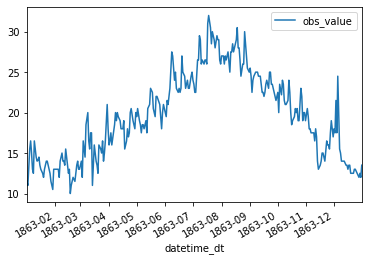

In [227]:
# YOUR CODE
plotdata = load_weather(1863).copy()
plotdata = plotdata[plotdata['station'] == 'AGE00135039']
plotdata.plot(y='obs_value')

